In [14]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import rand
from numpy import matmul
from numpy.linalg import inv

In [15]:
# Generate random data by adding noise to a line
noise = 4
w = rand(2,1) # y = w[0] + w[1]*x
x = np.linspace(-5,5,20)
y = w[0] + w[1]*x + noise*rand(len(x))

The linear regression model can be written as:

$$
y = w_0 + w_1 x = \mathbf{w}^\top \mathbf{x}
$$

where  
- $\mathbf{w} = [w_0,\, w_1]^\top$ is the weight vector,  
- $\mathbf{x} = [1,\, x]^\top$ is the feature vector (using the bias trick, $x_0 = 1$ for the intercept).

Here are some example values for $\mathbf{X}$, $\mathbf{y}$, and $\mathbf{w}$:

- $\mathbf{X}$ (design matrix, with a column of ones for the intercept and a column for $x$ values):

$$
\mathbf{X} = \begin{bmatrix}
1 & -5.00 \\
1 & -4.47 \\
1 & -3.95 \\
\vdots & \vdots \\
1 & 5.00 \\
\end{bmatrix}
$$

- $\mathbf{y}$ (target values):

$$
\mathbf{y} = \begin{bmatrix}
-2.32 \\
-1.37 \\
-2.13 \\
\vdots \\
9.08 \\
\end{bmatrix}
$$

- $\mathbf{w}$ (weights):

$$
\mathbf{w} = \begin{bmatrix}
0.51 \\
0.92 \\
\end{bmatrix}
$$



In [ ]:
X = np.column_stack((np.ones(len(x)), x.reshape(-1,1))) # add a column of ones to X for the intercept (bias trick)

The `.reshape(-1, 1)` method is used to convert a 1-dimensional numpy array into a 2-dimensional column vector.  
- `-1` means "infer the number of rows automatically".
- `1` means "make it a single column".

For example, if `x` is shape `(20,)`, then `x.reshape(-1, 1)` becomes shape `(20, 1)`.  
This is often needed when stacking arrays as columns (e.g., with `np.column_stack`) or for matrix operations that expect 2D arrays.

In [17]:
X

array([[ 1.        , -5.        ],
       [ 1.        , -4.47368421],
       [ 1.        , -3.94736842],
       [ 1.        , -3.42105263],
       [ 1.        , -2.89473684],
       [ 1.        , -2.36842105],
       [ 1.        , -1.84210526],
       [ 1.        , -1.31578947],
       [ 1.        , -0.78947368],
       [ 1.        , -0.26315789],
       [ 1.        ,  0.26315789],
       [ 1.        ,  0.78947368],
       [ 1.        ,  1.31578947],
       [ 1.        ,  1.84210526],
       [ 1.        ,  2.36842105],
       [ 1.        ,  2.89473684],
       [ 1.        ,  3.42105263],
       [ 1.        ,  3.94736842],
       [ 1.        ,  4.47368421],
       [ 1.        ,  5.        ]])

The normal equation for linear regression is:

$$
\mathbf{w} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
$$

where  
- $\mathbf{X}$ is the matrix of input features,  
- $\mathbf{y}$ is the vector of target values,  
- $\mathbf{w}$ is the vector of weights (parameters).

In [ ]:
# Calculate the weights using the Normal Equation
w_est = matmul(inv(matmul(X.T, X)), X.T).dot(y)
y_est = X.dot(w_est) # y_est = w_est[0] + w_est[1]*x

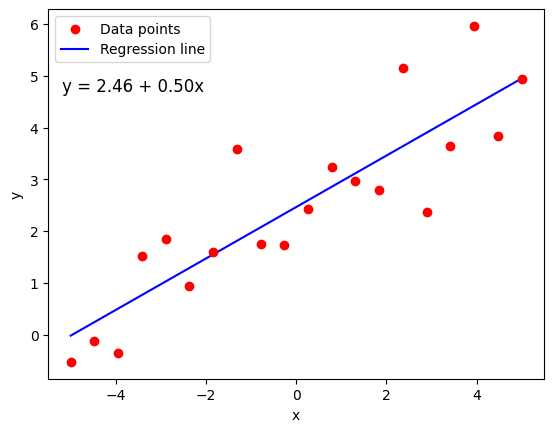

In [40]:
# Visualise the results
plt.scatter(x,y, color="red", label="Data points") 
plt.plot(x, y_est, color="blue", label="Regression line", zorder=0)
plt.legend()

# Show the equation of the line
plt.text(-5.2, 4.7, f"y = {w_est[0]:.2f} + {w_est[1]:.2f}x", fontsize=12, color="black")
plt.xlabel("x")
plt.ylabel("y")
plt.show()